In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler
dataset='banknote'
df=pd.read_csv('Dataset/banknote.csv').sample(frac=1.0).reset_index(drop=True)
N=len(df)

df=df.fillna(0)
feats=df.columns.values[:-1]
target=df.columns.values[-1]
scaler=MinMaxScaler()
scaler.fit(df[feats])
df[feats]=scaler.transform(df[feats])
ind=(df.Result==0)
df.loc[ind,'Result']=-1
df.head()

,Attr_A,Attr_B,Attr_C,Attr_D,Result
0,0.516580,0.523732,0.207329,0.865494,1
1,0.524753,0.346417,0.319021,0.908645,1
2,0.582834,0.255980,0.584785,0.659147,-1
3,0.603271,0.638716,0.237892,0.766375,-1
4,0.048619,0.815100,0.246012,0.484419,1


In [2]:
n_train=int(N*0.60)
_train_df=df.loc[:n_train]
_val_df=df.loc[n_train:]

_train_x=np.array(_train_df[feats],dtype=np.float64)
_train_y=np.array(_train_df[target],dtype=np.float64).reshape(-1,1)
_val_x=np.array(_val_df[feats],dtype=np.float64)
_val_y=np.array(_val_df[target],dtype=np.float64).reshape(-1,1)

In [3]:
class LinearRegression():
    def __init__(self,n_feats,C=1.0):
        np.random.seed(1)
        self.weights=np.random.random(n_feats+1)-0.5
        self.weights[0]=0.0
        print(self.weights)
        self.C=C
        
    def predict(self,X,Y):
        _X=np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
        self.Y=np.matmul(self.weights,_X.T)
        self.hinge=1-(self.Y*Y.reshape(-1))
        
        #self.loss=np.mean(np.square(self.weights)) + self.C*np.mean((np.maximum(0.0,self.Y*Y)))
        self.Y[self.Y>=0.0]=1.0
        self.Y[self.Y<0.0]=-1.0
        return self.Y
    
    def calc_grads(self,X,Y):
        _X=np. concatenate([np.ones((X.shape[0],1)),X],axis=1)
        mask = np.array(self.hinge>0,dtype=np.float32)
        self.grads=np.zeros_like(self.weights)
        
        for x,y,mask_val in zip(_X,Y,mask):
            self.grads += (1/X.shape[0])*(self.weights- self.C*x*y)
            self.grads+= (1/X.shape[0])*self.weights
        
        #_grads_a=mask*(self.weights - self.C*np.matmul(Y,X.T))
        #_grads_b=(1-mask)*(self.weights)
        #self.grads=_grads_a + _grads_b
        return self.grads
    
    def update_weights(self,lr):
        #print(self.grads)
        self.weights= self.weights - lr*self.grads
        

In [4]:
_svmc=LinearRegression(_train_x.shape[1],100)
batch_size=100
no_train_batch=len(_train_y)//batch_size
no_val_batch=len(_val_y)//batch_size

train_loss=[]
val_loss=[]
for _epoch in range(1000):
    _tloss=0
    _vloss=0
    
    for  b_ind in range(no_train_batch): 
        x_batch=_train_x[b_ind*batch_size:(b_ind+1)*batch_size]
        y_batch=_train_y[b_ind*batch_size:(b_ind+1)*batch_size]
        y_pred=_svmc.predict(x_batch,y_batch)
        _svmc.calc_grads(x_batch,y_batch)
        _svmc.update_weights(0.0001)
        _tloss+=np.mean(np.square(y_batch.reshape(-1)-y_pred))
        #print(y_pred)

    y_pred=_svmc.predict(_val_x,_val_y)
    _vloss+=np.mean(np.square(_val_y.reshape(-1)-y_pred))
    #print(_svmc.weights)
    print('Epoch',_epoch,'Train Loss',_tloss,'Validation Loss',_vloss)
    train_loss.append(_tloss)
    val_loss.append(_vloss)

[ 0.          0.22032449 -0.49988563 -0.19766743 -0.35324411]
Epoch 0 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 1 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 2 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 3 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 4 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 5 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 6 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 7 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 8 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 9 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 10 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 11 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 12 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 13 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 14 Train Loss 14.16 Validation Loss 1.7923497267759563
Epoch 15 Train Loss 14.16 Validat

Epoch 183 Train Loss 13.16 Validation Loss 1.6174863387978142
Epoch 184 Train Loss 13.16 Validation Loss 1.6174863387978142
Epoch 185 Train Loss 13.12 Validation Loss 1.6174863387978142
Epoch 186 Train Loss 13.12 Validation Loss 1.6174863387978142
Epoch 187 Train Loss 13.12 Validation Loss 1.6029143897996356
Epoch 188 Train Loss 13.079999999999998 Validation Loss 1.5956284153005464
Epoch 189 Train Loss 13.079999999999998 Validation Loss 1.5810564663023678
Epoch 190 Train Loss 13.079999999999998 Validation Loss 1.5810564663023678
Epoch 191 Train Loss 13.079999999999998 Validation Loss 1.5737704918032787
Epoch 192 Train Loss 13.079999999999998 Validation Loss 1.5664845173041895
Epoch 193 Train Loss 13.04 Validation Loss 1.5519125683060109
Epoch 194 Train Loss 13.0 Validation Loss 1.5519125683060109
Epoch 195 Train Loss 13.0 Validation Loss 1.5519125683060109
Epoch 196 Train Loss 13.0 Validation Loss 1.5446265938069217
Epoch 197 Train Loss 12.959999999999999 Validation Loss 1.544626593806

Epoch 334 Train Loss 8.48 Validation Loss 0.9836065573770492
Epoch 335 Train Loss 8.440000000000001 Validation Loss 0.9836065573770492
Epoch 336 Train Loss 8.280000000000001 Validation Loss 0.9836065573770492
Epoch 337 Train Loss 8.280000000000001 Validation Loss 0.97632058287796
Epoch 338 Train Loss 8.2 Validation Loss 0.97632058287796
Epoch 339 Train Loss 8.16 Validation Loss 0.97632058287796
Epoch 340 Train Loss 8.120000000000001 Validation Loss 0.97632058287796
Epoch 341 Train Loss 8.0 Validation Loss 0.97632058287796
Epoch 342 Train Loss 8.0 Validation Loss 0.9836065573770492
Epoch 343 Train Loss 7.96 Validation Loss 0.97632058287796
Epoch 344 Train Loss 7.92 Validation Loss 0.97632058287796
Epoch 345 Train Loss 7.88 Validation Loss 0.9690346083788707
Epoch 346 Train Loss 7.8 Validation Loss 0.9690346083788707
Epoch 347 Train Loss 7.76 Validation Loss 0.9617486338797814
Epoch 348 Train Loss 7.72 Validation Loss 0.9617486338797814
Epoch 349 Train Loss 7.68 Validation Loss 0.9617486

Epoch 487 Train Loss 5.76 Validation Loss 0.6338797814207651
Epoch 488 Train Loss 5.76 Validation Loss 0.6265938069216758
Epoch 489 Train Loss 5.76 Validation Loss 0.6338797814207651
Epoch 490 Train Loss 5.76 Validation Loss 0.6338797814207651
Epoch 491 Train Loss 5.76 Validation Loss 0.6338797814207651
Epoch 492 Train Loss 5.76 Validation Loss 0.6338797814207651
Epoch 493 Train Loss 5.72 Validation Loss 0.6338797814207651
Epoch 494 Train Loss 5.72 Validation Loss 0.6338797814207651
Epoch 495 Train Loss 5.72 Validation Loss 0.6338797814207651
Epoch 496 Train Loss 5.72 Validation Loss 0.6265938069216758
Epoch 497 Train Loss 5.72 Validation Loss 0.6265938069216758
Epoch 498 Train Loss 5.72 Validation Loss 0.6265938069216758
Epoch 499 Train Loss 5.72 Validation Loss 0.6265938069216758
Epoch 500 Train Loss 5.72 Validation Loss 0.6265938069216758
Epoch 501 Train Loss 5.72 Validation Loss 0.6265938069216758
Epoch 502 Train Loss 5.72 Validation Loss 0.6265938069216758
Epoch 503 Train Loss 5.7

Epoch 623 Train Loss 4.88 Validation Loss 0.5318761384335154
Epoch 624 Train Loss 4.88 Validation Loss 0.5318761384335154
Epoch 625 Train Loss 4.88 Validation Loss 0.5318761384335154
Epoch 626 Train Loss 4.84 Validation Loss 0.5318761384335154
Epoch 627 Train Loss 4.84 Validation Loss 0.5318761384335154
Epoch 628 Train Loss 4.84 Validation Loss 0.5318761384335154
Epoch 629 Train Loss 4.84 Validation Loss 0.5318761384335154
Epoch 630 Train Loss 4.84 Validation Loss 0.5318761384335154
Epoch 631 Train Loss 4.84 Validation Loss 0.5318761384335154
Epoch 632 Train Loss 4.84 Validation Loss 0.5245901639344263
Epoch 633 Train Loss 4.84 Validation Loss 0.5245901639344263
Epoch 634 Train Loss 4.84 Validation Loss 0.5245901639344263
Epoch 635 Train Loss 4.84 Validation Loss 0.5245901639344263
Epoch 636 Train Loss 4.84 Validation Loss 0.5245901639344263
Epoch 637 Train Loss 4.8 Validation Loss 0.5245901639344263
Epoch 638 Train Loss 4.8 Validation Loss 0.5245901639344263
Epoch 639 Train Loss 4.8 V

Epoch 778 Train Loss 4.24 Validation Loss 0.45901639344262296
Epoch 779 Train Loss 4.2 Validation Loss 0.45901639344262296
Epoch 780 Train Loss 4.16 Validation Loss 0.45901639344262296
Epoch 781 Train Loss 4.16 Validation Loss 0.45901639344262296
Epoch 782 Train Loss 4.12 Validation Loss 0.45901639344262296
Epoch 783 Train Loss 4.08 Validation Loss 0.45901639344262296
Epoch 784 Train Loss 4.08 Validation Loss 0.45901639344262296
Epoch 785 Train Loss 4.08 Validation Loss 0.45901639344262296
Epoch 786 Train Loss 4.08 Validation Loss 0.45901639344262296
Epoch 787 Train Loss 4.08 Validation Loss 0.45901639344262296
Epoch 788 Train Loss 4.08 Validation Loss 0.45901639344262296
Epoch 789 Train Loss 4.08 Validation Loss 0.45901639344262296
Epoch 790 Train Loss 4.08 Validation Loss 0.4517304189435337
Epoch 791 Train Loss 4.08 Validation Loss 0.4517304189435337
Epoch 792 Train Loss 4.08 Validation Loss 0.4517304189435337
Epoch 793 Train Loss 4.08 Validation Loss 0.4517304189435337
Epoch 794 Tra

Epoch 920 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 921 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 922 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 923 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 924 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 925 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 926 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 927 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 928 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 929 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 930 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 931 Train Loss 3.6 Validation Loss 0.4371584699453552
Epoch 932 Train Loss 3.56 Validation Loss 0.4371584699453552
Epoch 933 Train Loss 3.56 Validation Loss 0.4371584699453552
Epoch 934 Train Loss 3.56 Validation Loss 0.4371584699453552
Epoch 935 Train Loss 3.56 Validation Loss 0.4371584699453552
Epoch 936 Train Loss 3.56 Validation

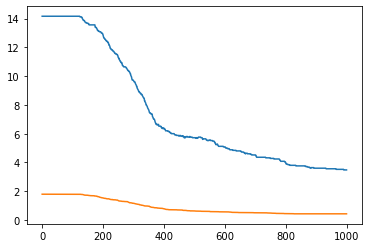

In [5]:
from matplotlib import pyplot as plt
plt.plot(train_loss)
plt.plot(val_loss)

In [6]:
acc=np.sum(np.array(y_pred==_val_y.reshape(-1),dtype=np.uint8))/len(_val_y)
print('accuracy',acc*100,"%")
result_log=pd.DataFrame({})
result_log['true']=_val_y.reshape(-1)
result_log['pred']=y_pred
result_log['right']=np.array((y_pred==_val_y.reshape(-1)),dtype=np.int8)
result_log['wrong']=np.array((y_pred!=_val_y.reshape(-1)),dtype=np.int8)

accuracy 89.25318761384335 %


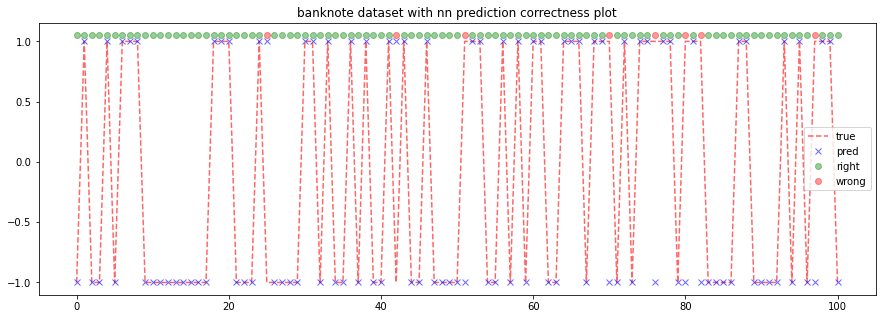

In [7]:
from matplotlib import pyplot as plt
#plt.plot(result_log[['right','wrong']])

fig=plt.figure(figsize=(15,5))
plt.plot(result_log.loc[:100,'true'],'r--',alpha=0.6)
plt.plot(result_log.loc[:100,'pred'],'bx',alpha=0.6)
plt.plot(result_log.loc[:100,'right'][result_log.loc[:100,'right']==1]+0.05,'go',alpha=0.4)
plt.plot(result_log.loc[:100,'right'][result_log.loc[:100,'right']==0]+1.05,'ro',alpha=0.4)
#plt.plot(result_log.loc[:100,'right'],'go',alpha=0.3)
plt.legend(['true','pred','right','wrong'])
plt.title(dataset+' dataset with nn prediction correctness plot')# \n right : 1 \n wrong : 0')
plt.savefig(dataset+'_svm_pred.png')
plt.show()

In [8]:
total=len(result_log)
acc=result_log.right.sum()#,len(result_log)
accuracy=acc/total
labels=result_log['true'].unique()
ldf=pd.DataFrame(data={},index=[' '])
precisions={}
recalls={}
for label in labels:
    true_ind=result_log['true']==label
    false_ind=result_log['true']!=label
    Yes=result_log.loc[true_ind]
    No=result_log.loc[false_ind]
    tp=Yes.right.sum()
    tn=No.right.sum()
    fn=Yes.wrong.sum() #wrong after negative prediction means positive
    fp=No.wrong.sum() #wrong after positive prediction means negative
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    precisions[label]=precision
    recalls[label]=recall
    print('----------------------')
    print('label',label)
    print('precision',precision)
    print('recall',recall)
    print('----------------------')
print('Over All Accuracy : ',accuracy)

----------------------
label -1.0
precision 0.8674698795180723
recall 0.9504950495049505
----------------------
----------------------
label 1.0
precision 0.9308755760368663
recall 0.8211382113821138
----------------------
Over All Accuracy :  0.8925318761384335


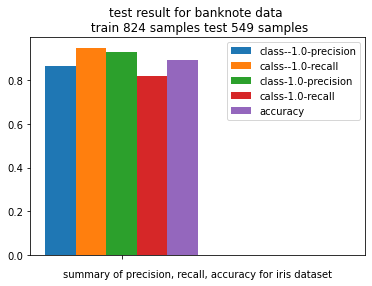

In [9]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

df=pd.DataFrame({},index=[' '])
#fig=plt.figure(figsize=(10,10))
for label in result_log['true'].unique():
    df['class-'+str(label)+'-precision']=[precisions[label],]
    df['calss-'+str(label)+'-recall']=[recalls[label],]
df['accuracy']=accuracy 
df.plot.bar()
plt.xlim(-.3,.8)
plt.title('test result for ' +dataset+ ' data \n '+'train '+str(len(_train_df))+' samples test '+str(len(result_log))+' samples')
plt.xlabel('summary of precision, recall, accuracy for iris dataset')
plt.savefig(dataset+'_svm.png')
plt.show()